In [1]:
import pandas as pd
pd.__version__

'2.2.2'

In [2]:
df=pd.read_csv("EasyVisa.csv")
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [3]:
df.shape

(25480, 12)

In [4]:
# Statistical summary
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


## EXPLORING DATA

In [6]:
# Define numerical and categorical columns
numeric_features = df.select_dtypes(exclude='O').columns.tolist()
categorical_features = df.select_dtypes(include='O').columns.tolist()

# Print numerical and categorical columns
print(f"We have {len(numeric_features)} numerical features: {numeric_features}")
print(f"\nWe have {len(categorical_features)} categorical features: {categorical_features}")


We have 3 numerical features: ['no_of_employees', 'yr_of_estab', 'prevailing_wage']

We have 9 categorical features: ['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


* Use `select_dtypes()`: This is more efficient than manually checking data types with `.dtype`.
* List Conversion: `.columns.tolist()` is used to directly convert to a list.


In [7]:
# Proportion of count data for categorical columns
for col in categorical_features:
    print(f"Column: {col}")
    print(df[col].value_counts(normalize=True).mul(100).round(2).astype(str) + '%')
    # mul(100).round(2): Converts the proportions to percentages,
    # rounded to two decimal places for better readability.
    print('-' * 30)


Column: case_id
case_id
EZYV01       0.0%
EZYV16995    0.0%
EZYV16993    0.0%
EZYV16992    0.0%
EZYV16991    0.0%
             ... 
EZYV8492     0.0%
EZYV8491     0.0%
EZYV8490     0.0%
EZYV8489     0.0%
EZYV25480    0.0%
Name: proportion, Length: 25480, dtype: object
------------------------------
Column: continent
continent
Asia             66.17%
Europe           14.65%
North America    12.92%
South America     3.34%
Africa            2.16%
Oceania           0.75%
Name: proportion, dtype: object
------------------------------
Column: education_of_employee
education_of_employee
Bachelor's     40.16%
Master's       37.81%
High School    13.42%
Doctorate        8.6%
Name: proportion, dtype: object
------------------------------
Column: has_job_experience
has_job_experience
Y    58.09%
N    41.91%
Name: proportion, dtype: object
------------------------------
Column: requires_job_training
requires_job_training
N    88.4%
Y    11.6%
Name: proportion, dtype: object
-----------------------

## Univariate Analysis

**Univariate analysis** refers to the analysis of a single variable. The prefix "uni" means "one," indicating that we are examining the distribution and characteristics of one variable at a time. The purpose of univariate analysis is to summarize and understand the underlying patterns, trends, or outliers within that variable.

### Other Types of Analysis:

- **Bivariate Analysis**: This involves the analysis of two variables to explore relationships or correlations between them.
  
- **Multivariate Analysis**: This extends to the analysis of two or more variables, often used to understand complex relationships and interactions among multiple variables.



### Numerical Features

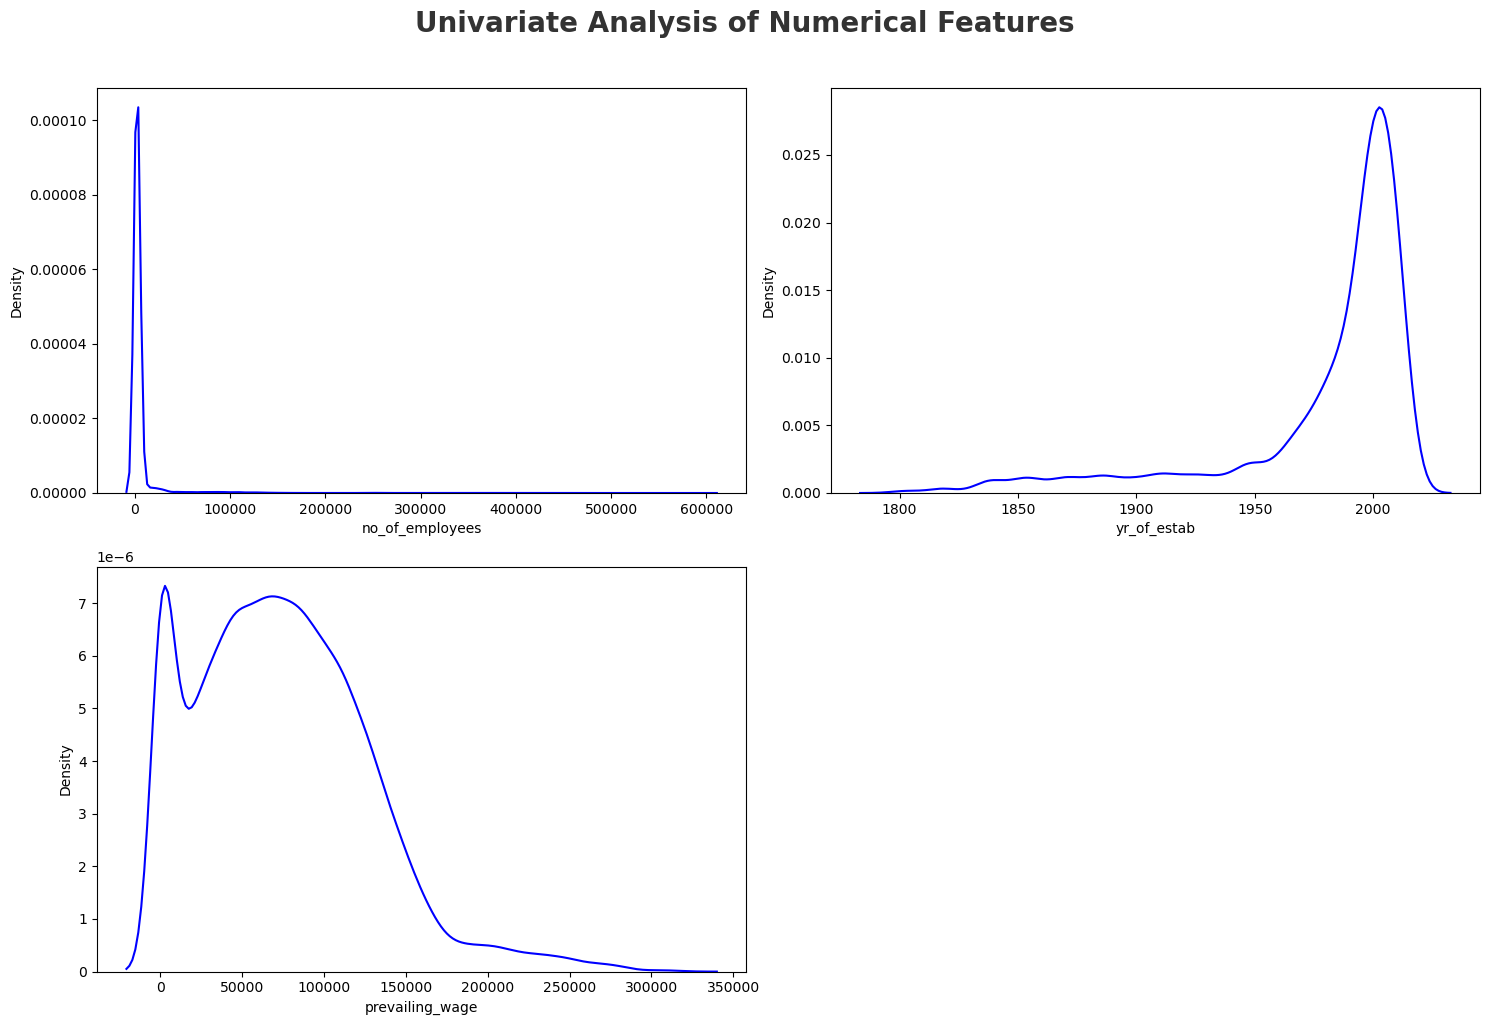

In [8]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size and overall title for the plots
plt.figure(figsize=(15, 10))  # Create a figure window with a custom size
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.02)  # Set the title with styling

# Loop through each numerical feature to plot its distribution
for i in range(0, len(numeric_features)):
    plt.subplot(2, 2, i + 1)  # Create a 2x2 grid of subplots, placing each plot in the next available space
    sns.kdeplot(x=df[numeric_features[i]], color='blue')  # Plot the Kernel Density Estimate (KDE) of the current feature
    plt.xlabel(numeric_features[i])  # Set the x-axis label to the feature name

    plt.tight_layout()  # Adjust subplot spacing to ensure there's no overlap

# Show the plot
plt.show()


## Categorical Features

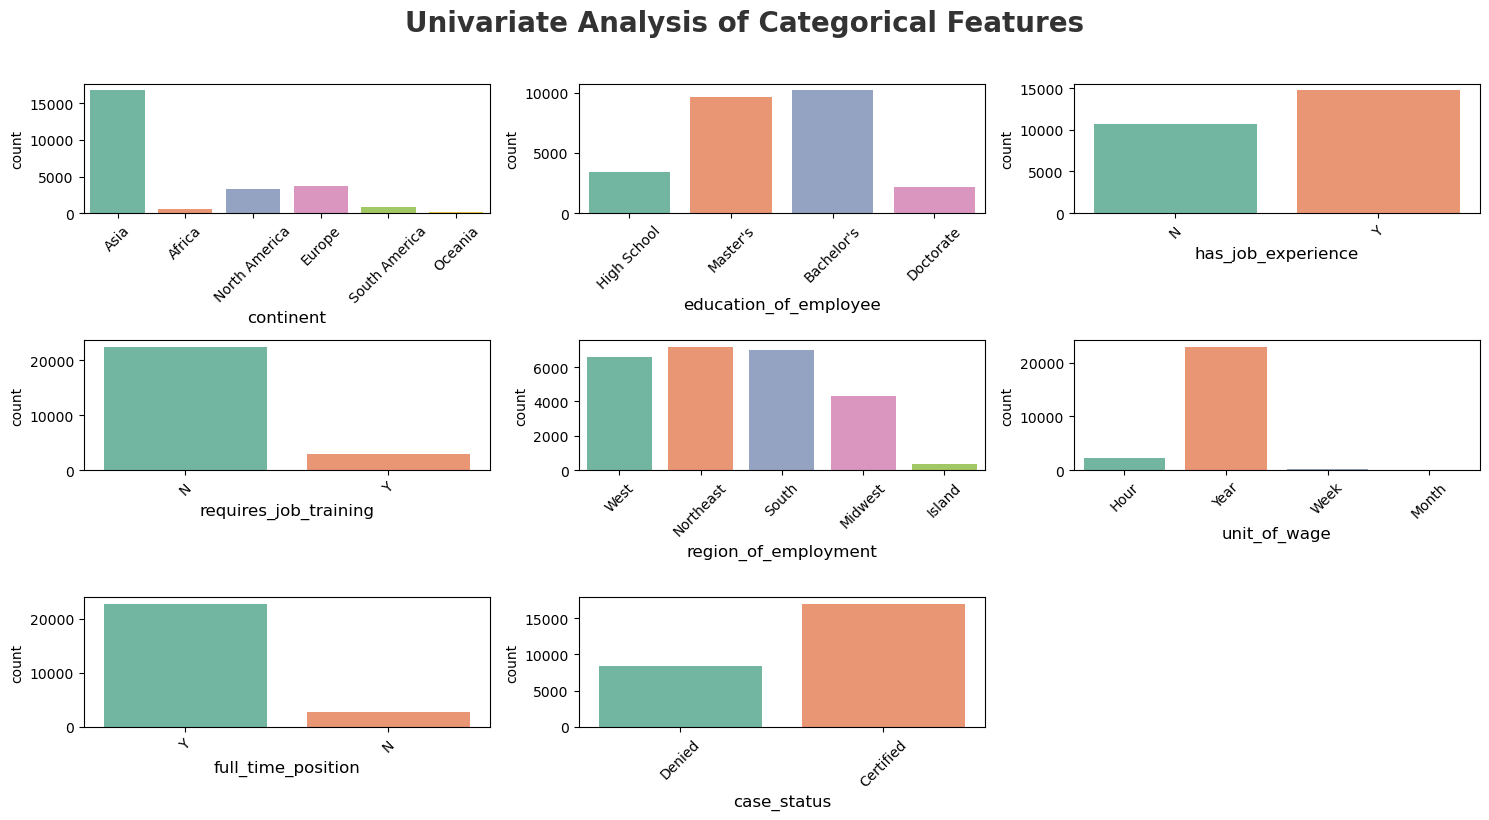

In [9]:
# Remove 'case_id' from the list of categorical features as it is not relevant for analysis
categorical_features.remove('case_id')

# Set up the figure size and the overall title for the categorical feature analysis
plt.figure(figsize=(15, 8))  # Create a figure window with a custom size
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.02)  # Set the title with styling

# Loop through each categorical feature to plot its count distribution
for i in range(len(categorical_features)):
    plt.subplot(3, 3, i + 1)  # Create a 3x3 grid for subplots, positioning each plot in a specific grid cell
    sns.countplot(x=df[categorical_features[i]], hue=df[categorical_features[i]], palette='Set2', legend=False)  # Plot the count of each category with hue
    plt.xlabel(categorical_features[i], fontsize=12)  # Set the x-axis label with appropriate feature name and font size
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if the category names are long

    plt.tight_layout()  # Ensure proper spacing between subplots to avoid overlap

# Display the plots
plt.show()


insight: signle category dominating throughout.

removing `case_id` as it doesnt contain any meaningfull info and it is also not in out *database*

## Multivariate Analysis

In [10]:
# Identify discrete features (numeric features with 25 or fewer unique values)
discrete_features = [feature for feature in numeric_features if len(df[feature].unique()) <= 25]

# Identify continuous features (numeric features with more than 25 unique values)
continuous_features = [feature for feature in numeric_features if len(df[feature].unique()) > 25]

# Print the count and names of discrete features
print(f'We have {len(discrete_features)} discrete features: {discrete_features}')

# Print the count and names of continuous features
print(f'We have {len(continuous_features)} continuous features: {continuous_features}')


We have 0 discrete features: []
We have 3 continuous features: ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


## Check Multicollinearity in Numerical features

In [11]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


there is no multicollinearity

## Check Multicollinearity for Categorical features

### Chi-Square Test: Overview

The **Chi-Square Test** (χ² test) is a statistical test used to determine whether there is a significant association between two categorical variables. It is used in scenarios where both the predictor and target variables are categorical, and the goal is to assess whether the distribution of one variable depends on the other.

#### How Chi-Square Test Works
1. **Null Hypothesis (H₀)**: There is no association between the two variables (they are independent).
2. **Alternative Hypothesis (H₁)**: There is an association between the two variables (they are not independent).

The test compares the **observed frequency** of occurrences in each category of a contingency table with the **expected frequency** (the frequency we would expect if there was no relationship between the variables). The Chi-Square test statistic is calculated as:

$$
\chi^2 = \sum \frac{(O - E)^2}{E}
$$



Where:
- **O** is the observed frequency.
- **E** is the expected frequency.

A high value of the Chi-Square statistic indicates a large difference between observed and expected frequencies, suggesting a relationship between the variables. The test returns a **p-value**, which helps us decide whether to reject or fail to reject the null hypothesis.

#### Interpreting the p-value
- **p-value < 0.05**: Reject the null hypothesis (there is a significant association between the variables).
- **p-value >= 0.05**: Fail to reject the null hypothesis (no significant association).

---

### Testing Correlation of Categorical Columns with the Target (`case_status`)

Since your target variable `case_status` is categorical, you can use the **Chi-Square test** to check whether the categorical features (like `continent`, `education_of_employee`, etc.) are significantly associated with `case_status`. Here's how you can go about testing this:

1. **Construct Contingency Tables**: These tables will show the frequencies of each combination of values between the categorical feature and the target variable.
   
2. **Run the Chi-Square Test**: Apply the test to each categorical feature using its contingency table to determine whether the feature and `case_status` are independent.

---

### Example Code for Testing Correlation of Categorical Columns with `case_status`



In [12]:
from scipy.stats import chi2_contingency
import pandas as pd

# List to store test results
chi2_test_results = []

# Iterate over all categorical features
for feature in categorical_features:
    # Create a contingency table
    contingency_table = pd.crosstab(df['case_status'], df[feature])

    # Apply the Chi-Square test
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

    # Interpret the p-value
    if p_value < 0.05:
        chi2_test_results.append((feature, 'Significant (Reject H₀)', p_value))
    else:
        chi2_test_results.append((feature, 'Not Significant (Fail to Reject H₀)', p_value))

# Convert results to a DataFrame for easier interpretation
chi2_test_df = pd.DataFrame(chi2_test_results, columns=['Feature', 'Hypothesis Result', 'p-value'])

# Display the results
chi2_test_df

,Feature,Hypothesis Result,p-value
0,continent,Significant (Reject H₀),8.828798e-74
1,education_of_employee,Significant (Reject H₀),0.000000e+00
2,has_job_experience,Significant (Reject H₀),1.922560e-206
3,requires_job_training,Not Significant (Fail to Reject H₀),1.855647e-01
4,region_of_employment,Significant (Reject H₀),2.338664e-63
5,unit_of_wage,Significant (Reject H₀),5.193385e-240
6,full_time_position,Significant (Reject H₀),4.469975e-02
7,case_status,Significant (Reject H₀),0.000000e+00


### Explanation:
- **Contingency Table**: The `pd.crosstab()` function creates a contingency table between `case_status` and the categorical feature.
- **Chi-Square Test**: `chi2_contingency()` performs the test, returning the test statistic, p-value, degrees of freedom, and expected frequencies.
- **Result Interpretation**: Based on the p-value, if it's below 0.05, we reject the null hypothesis, indicating a significant association between the feature and the `case_status`.

### Conclusion:
The Chi-Square test is an effective method for checking the correlation between categorical features and a categorical target variable (like `case_status`). By applying it, you can identify which features are statistically significant in relation to the target, helping in feature selection or engineering during your analysis process.

**INSIGHT:** The test result for `requires_job_training` shows that there is no significant relationship with case status. This suggests that whether a job requires training does not seem to influence the outcomes of the cases. It could imply that both trained and untrained employees face similar challenges in the employment process.

## Checking Null Values

In [13]:
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

## Continious features

Continuous features can take any value within a given range, including decimal (fractional) values. These are typically measured and can take an infinite number of values.

**Examples:**

* Height (e.g., 5.72 feet)
* Weight (e.g., 72.5 kg)
* Temperature (e.g., 98.6°F)

**Characteristics:**

* Values are often represented with floating-point numbers.
* Continuous features have a range (min to max) but can theoretically take any value within that range.
* In theory, there are no gaps between values.

In [14]:
contin_features=[feature for feature in numeric_features if feature not in discrete_features]
print(f"Continious Feature Columns: {contin_features}")
print(f"Number of Continious Feature Columns: {len(contin_features)}")

Continious Feature Columns: ['no_of_employees', 'yr_of_estab', 'prevailing_wage']
Number of Continious Feature Columns: 3


/tmp/ipykernel_68907/3979484533.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='case_status', y=col, palette=clr1, ax=ax[i, 0])
/tmp/ipykernel_68907/3979484533.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='case_status', y=col, palette=clr1, ax=ax[i, 0])
/tmp/ipykernel_68907/3979484533.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='case_status', y=col, palette=clr1, ax=ax[i, 0])


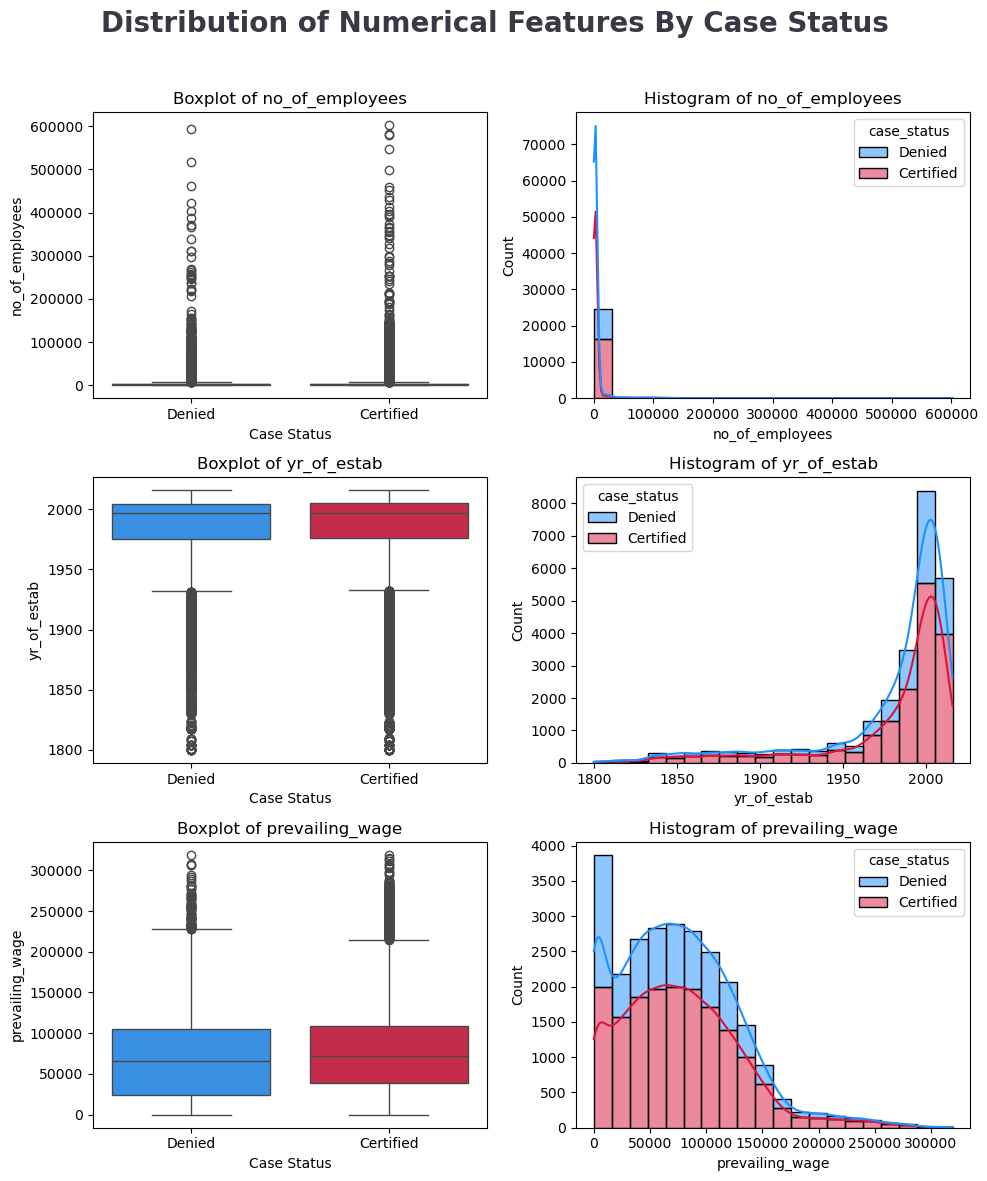

In [15]:
# Define colors for the plots
clr1 = ['#1E90FF', '#DC143C']

# Set up a grid of subplots: 3 rows and 2 columns
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10, 12))

# Main title for the figure
fig.suptitle('Distribution of Numerical Features By Case Status',
             color='#3C3744', fontsize=20, fontweight='bold', ha='center')

# Loop over continuous features and create the boxplots and histograms
for i, col in enumerate(continuous_features):
    # Boxplot to compare distributions of 'case_status' for each continuous feature
    sns.boxplot(data=df, x='case_status', y=col, palette=clr1, ax=ax[i, 0])
    ax[i, 0].set_title(f'Boxplot of {col}', fontsize=12)
    ax[i, 0].set_xlabel('Case Status')  # Label x-axis
    ax[i, 0].set_ylabel(col)  # Label y-axis

    # Histogram with stacked bars, displaying distribution by 'case_status'
    sns.histplot(data=df, x=col, hue='case_status', bins=20, kde=True,
                 multiple='stack', palette=clr1, ax=ax[i, 1])
    ax[i, 1].set_title(f'Histogram of {col}', fontsize=12)
    ax[i, 1].set_xlabel(col)  # Label x-axis
    ax[i, 1].set_ylabel('Count')  # Label y-axis

# Adjust layout to avoid overlap and improve spacing
fig.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust to leave space for the title

# Optional: Save the figure (commented out for now)
# plt.savefig('images/multivariate_num.png')

# Show the plot
plt.show()


**NOTE:**
  
* **Continuous features** are usually treated with *scaling* techniques (e.g., Min-Max scaling, Standardization).
* **Discrete features** might be treated as either *categorical* or *ordinal* depending on their context or binned into categories.

### Initial Analysis Report

1. **No of Employees:**
   - The `no_of_employees` feature contains numerous outliers, which should be addressed during feature engineering.
   - The distribution is **right-skewed**, indicating that most companies have a smaller workforce, with fewer having a significantly larger number of employees.

2. **Year of Establishment (yr_of_estab):**
   - This feature is **left-skewed**, meaning more companies were established in recent years.
   - A few outliers exist below the lower bound of the box plot, suggesting unusually early establishment years that may require further investigation.

3. **Prevailing Wage:**
   - The `prevailing_wage` feature is also **right-skewed**, with a long tail of higher wages.
   - There are notable outliers above the upper bound of the box plot, which may need treatment to avoid influencing model performance.

4. **Missing Data:**
   - There are **no missing values** in the dataset, which simplifies preprocessing.

5. **Case ID:**
   - The `case_id` column consists of unique values for each row, and since it doesn't provide useful information for prediction, it can be safely **dropped**.

6. **Case Status:**
   - The `case_status` column is the **target variable** for prediction, where the objective is to classify each case as either approved or denied.

7. **Categorical Features:**
   - Many categorical features can be converted into **binary numerical** representations during feature encoding to make them suitable for machine learning algorithms.

## Visualize, Visualize, Visualize
### Visualize the Target Feature

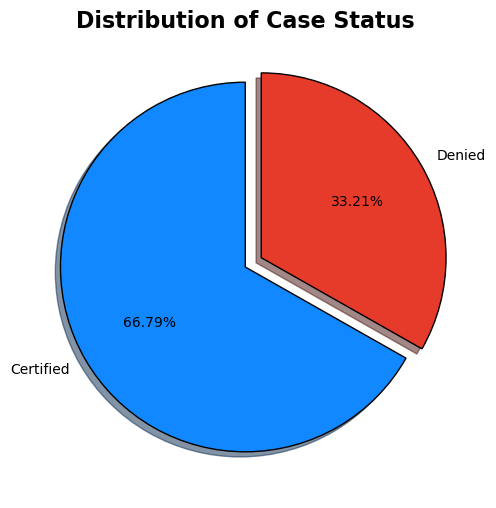

In [16]:
# Calculate the percentage distribution of 'case_status'
percentage = df['case_status'].value_counts(normalize=True) * 100
labels = ["Certified", "Denied"]  # Define labels for the pie chart

# Set up the figure and axis for the pie chart
fig, ax = plt.subplots(figsize=(6, 6))

# Define the explode and color scheme for the slices
explode = (0, 0.1)  # Slightly "explode" the second slice (Denied)
colors = ['#1188ff', '#e63a2a']  # Custom colors for each slice

# Plot the pie chart
ax.pie(percentage, labels=labels, startangle=90, autopct='%1.2f%%',
       explode=explode, shadow=True, colors=colors, wedgeprops={'edgecolor': 'black'})

# Add a title to the chart
plt.title('Distribution of Case Status', fontsize=16, fontweight='bold')

# Display the plot
plt.show()


from the above chart we can see that there is an imbalance in data between the approved and denied values

### Impact of Continent on Visa Status

In [17]:
# Group by continent and their case status
df.groupby("continent")["case_status"].value_counts(normalize=True).to_frame()*100

proportion
continent     case_status            
Africa        Certified     72.050817
              Denied        27.949183
Asia          Certified     65.310480
              Denied        34.689520
Europe        Certified     79.233655
              Denied        20.766345
North America Certified     61.877278
              Denied        38.122722
Oceania       Certified     63.541667
              Denied        36.458333
South America Certified     57.863850
              Denied        42.136150

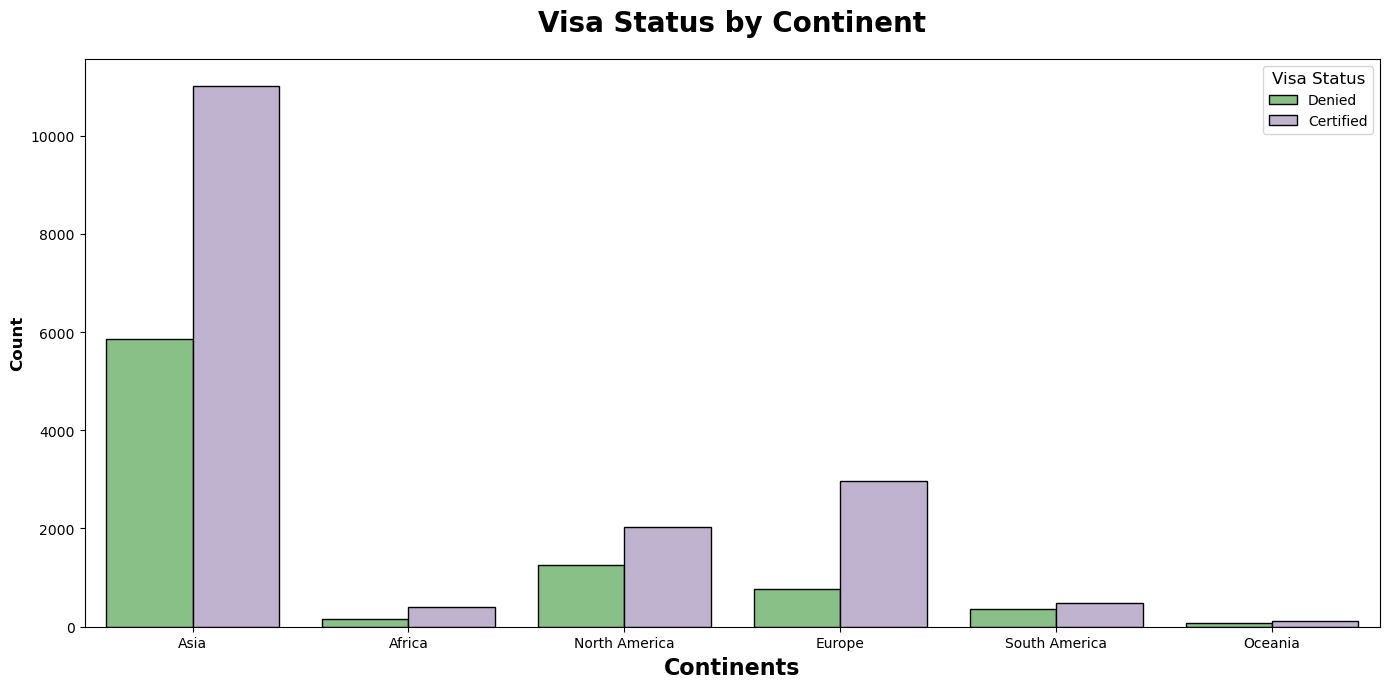

In [18]:
# Set up the figure and axis for the plot
plt.figure(figsize=(14, 7))

# Plot the count of 'continent' with 'case_status' as hue
sns.countplot(x="continent", hue="case_status", data=df,
              edgecolor="black", palette="Accent")

# Add a title with better formatting
plt.title("Visa Status by Continent", weight="bold", fontsize=20, pad=20)

# Customize the labels for the x-axis and y-axis
plt.xlabel("Continents", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)

# Improve the legend appearance
plt.legend(title="Visa Status", fancybox=True, title_fontsize=12, fontsize=10)

# Adjust the layout for better spacing and show the plot
plt.tight_layout()
plt.show()


/tmp/ipykernel_68907/664133319.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = certified_percentage[n]


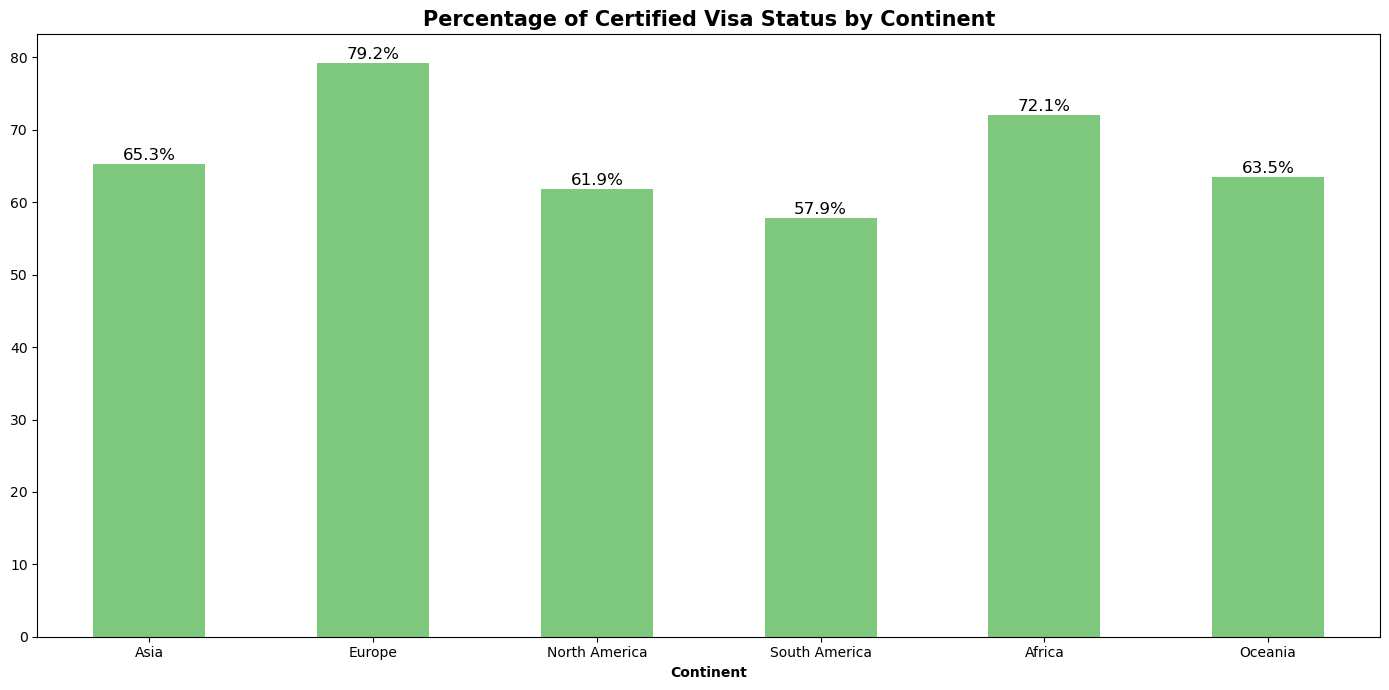

In [19]:
# Create a copy of the DataFrame to avoid affecting the original data
df2 = df.copy()

# Set the figure size
plt.figure(figsize=[14, 7])

# Calculate the percentage of 'Certified' visa status for each continent
certified_percentage = 100 * df2[df2["case_status"] == 'Certified']['continent'].value_counts() / df2['continent'].value_counts()

# Plot a bar chart to show the percentage of 'Certified' visa status by continent
certified_percentage.plot(kind='bar', stacked=True, colormap='Accent')

# Add title and axis labels with appropriate formatting
plt.title("Percentage of Certified Visa Status by Continent", fontsize=15, fontweight='bold')
plt.xlabel('Continent', fontweight='bold')

# Rotate the x-axis labels for readability
plt.xticks(rotation=0)

# Add percentage labels on top of each bar
for n in range(certified_percentage.shape[0]):
    count = certified_percentage[n]
    label = f'{count:.1f}%'  # Format the percentage to one decimal place
    plt.text(n, count + 0.5, label, ha='center', fontsize=12)  # Adjust text positioning

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()


* Asia has the highest number of applicants compared to other continents, contributing significantly to the total applications.
* 43% of the certified visa applications originate from Asia, making it the largest contributor to certified cases.
* Europe follows with 11% of certified applications, showing a notable presence in the applicant pool.
* Applicants from Europe have the highest likelihood of certification, closely followed by applicants from Africa.

**Observation:** This highlights that while Asia leads in the number of applications, European applicants enjoy a higher success rate in certification

### Impact of education on visa approval

In [20]:
#group data by Education and their count of case_status
df.groupby('education_of_employee')['case_status'].value_counts(normalize=True).to_frame()*100


proportion
education_of_employee case_status            
Bachelor's            Certified     62.214188
                      Denied        37.785812
Doctorate             Certified     87.226277
                      Denied        12.773723
High School           Denied        65.964912
                      Certified     34.035088
Master's              Certified     78.627777
                      Denied        21.372223

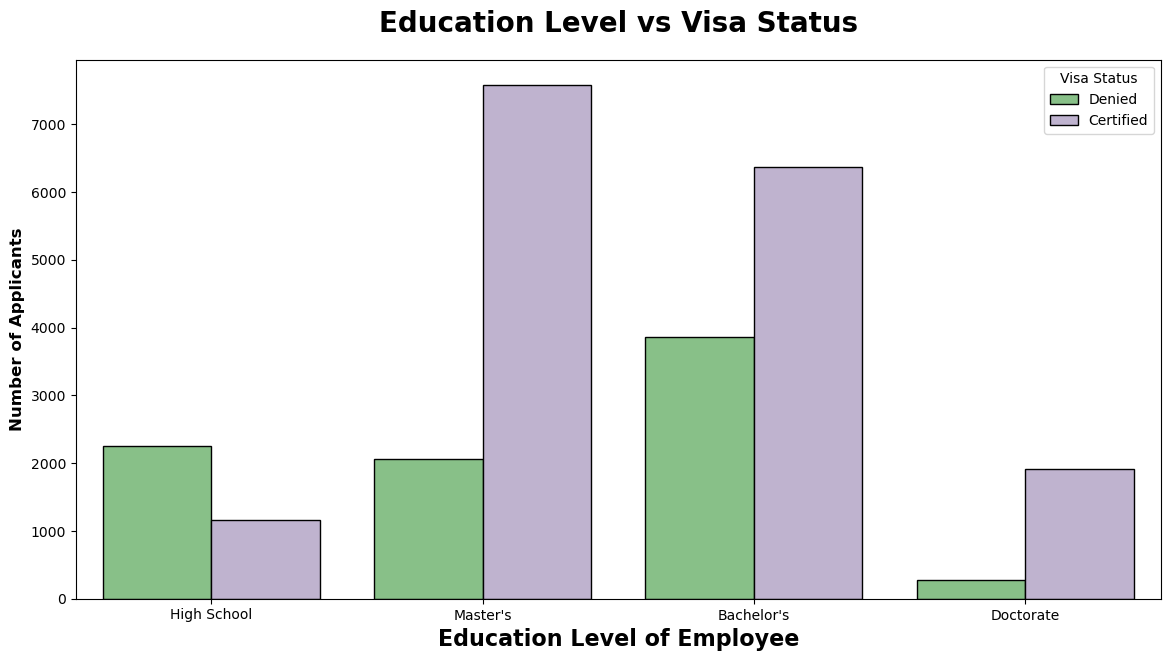

In [21]:
# Set figure size for better visibility
plt.figure(figsize=(14, 7))

# Create a count plot to visualize the relationship between education level and visa status
sns.countplot(x="education_of_employee", hue="case_status", data=df,
              edgecolor="black", palette="Accent")

# Add a descriptive title with proper formatting
plt.title("Education Level vs Visa Status", fontsize=20, fontweight="bold", pad=20)

# Customize axis labels for clarity and visual appeal
plt.ylabel("Number of Applicants", fontsize=12, fontweight="bold")
plt.xlabel("Education Level of Employee", fontsize=16, fontweight="bold")

# Enhance legend appearance
plt.legend(title="Visa Status", fancybox=True, loc='upper right')

# Display the final plot
plt.show()


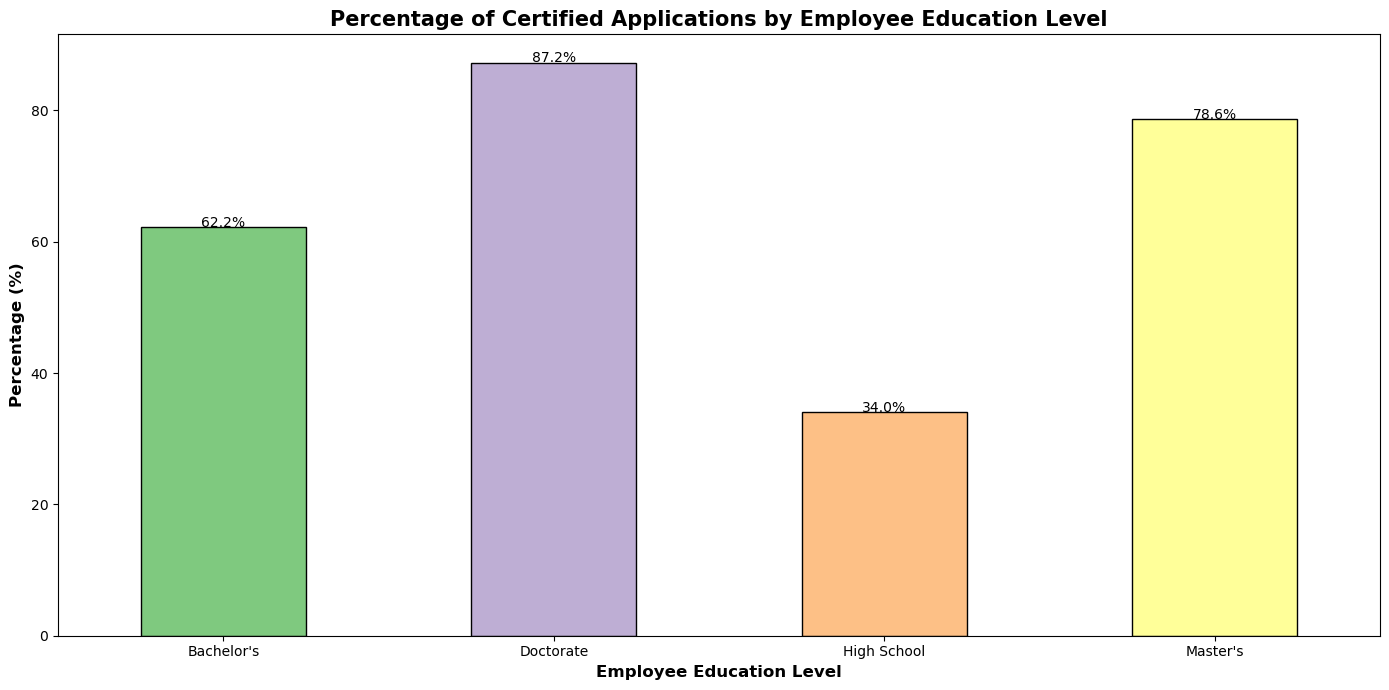

In [22]:
import seaborn as sns

# Set figure size for better visibility
plt.figure(figsize=(14, 7))

# Calculate the percentage of certified applications by education level
certified_percentage = (
    100 * df2[df2["case_status"] == 'Certified']['education_of_employee'].value_counts() /
    df2['education_of_employee'].value_counts()
)

# Get colors from the Accent palette
colors = sns.color_palette("Accent", n_colors=len(certified_percentage))

# Plot the bar chart for certified application percentages
certified_percentage.plot(kind='bar', color=colors, edgecolor='black')

# Add a descriptive title with proper formatting
plt.title("Percentage of Certified Applications by Employee Education Level", fontsize=15, fontweight='bold')

# Annotate each bar with its percentage value
for index, value in enumerate(certified_percentage):
    percentage_str = '{:.1f}%'.format(value)
    plt.text(index, value + 0.1, percentage_str, ha='center', fontsize=10)

# Customize axis labels for clarity
plt.xlabel('Employee Education Level', fontweight='bold', fontsize=12)
plt.ylabel('Percentage (%)', fontweight='bold', fontsize=12)

# Adjust x-tick labels for better readability
plt.xticks(rotation=0)

# Display the final plot
plt.tight_layout()
plt.show()


**Insights**

- **Impact of Education Level**: The education status of applicants significantly influences their acceptance rates.
- **Higher Acceptance for Advanced Degrees**: Applicants with Doctorate and Master's degrees have a notably higher likelihood of being accepted compared to those with lower educational qualifications. This trend suggests that advanced education may enhance the prospects of visa approval.

### Impact of work experiece

In [23]:
df.groupby('has_job_experience')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
has_job_experience case_status            
N                  Certified     56.134108
                   Denied        43.865892
Y                  Certified     74.476422
                   Denied        25.523578

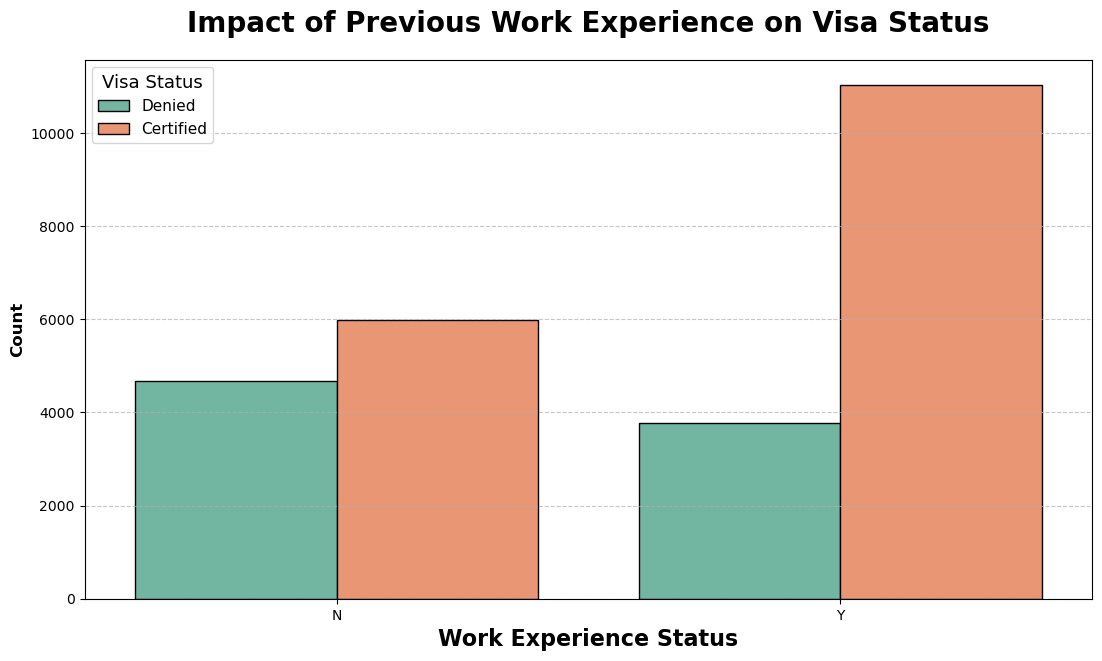

In [24]:
# Set the size of the figure for the count plot
plt.subplots(figsize=(13, 7))

# Create a count plot for 'has_job_experience' colored by 'case_status'
sns.countplot(
    x="has_job_experience",
    hue="case_status",
    data=df,
    edgecolor="black",
    palette="Set2",  # Changed to a more distinguishable color palette
    dodge=True,      # Separate bars for better visibility
)

# Add a descriptive title with proper formatting
plt.title("Impact of Previous Work Experience on Visa Status", weight="bold", fontsize=20, pad=20)

# Label the axes with appropriate weights and font sizes
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Work Experience Status", weight="bold", fontsize=16)

# Improve legend styling for better clarity
plt.legend(title="Visa Status", fancybox=True, title_fontsize='13', fontsize='11')

# Add grid lines to the y-axis for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

/tmp/ipykernel_68907/3971315355.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = certified_percentage[n]


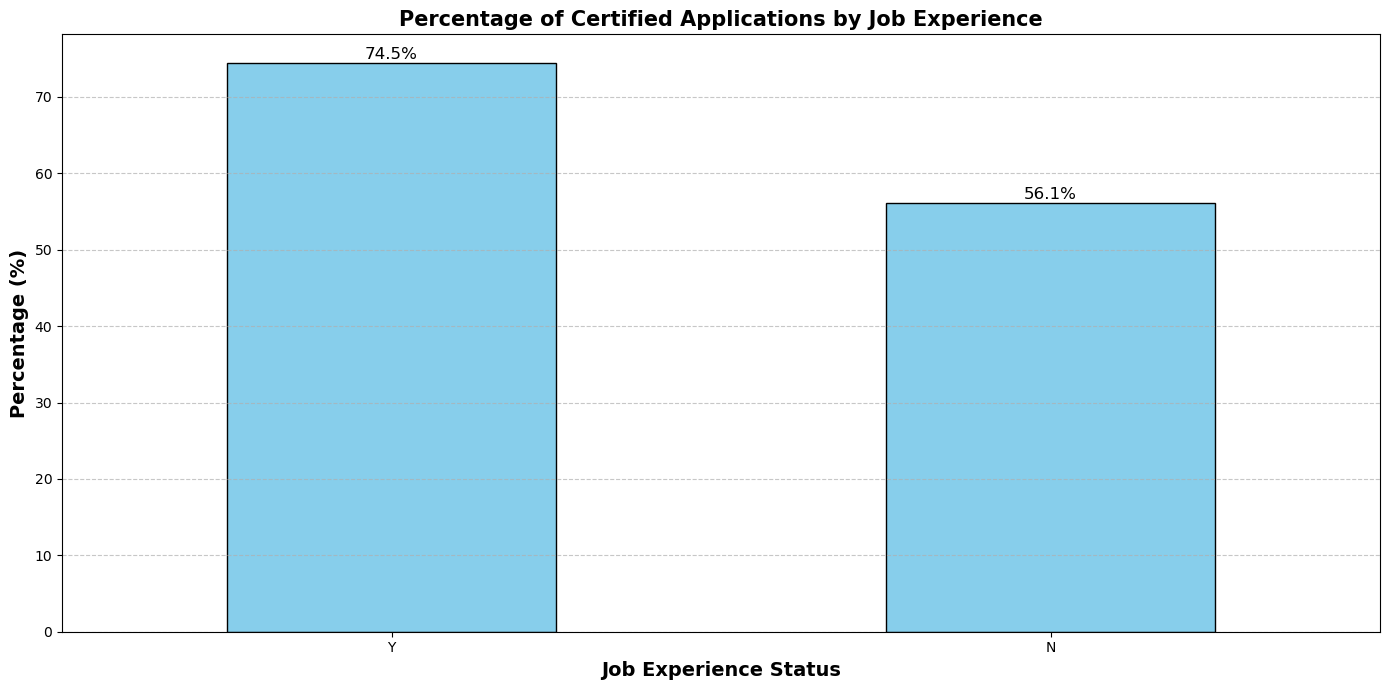

In [25]:
# Set the figure size for the bar chart
plt.figure(figsize=[14, 7])

# Calculate the percentage of certified applications based on job experience
certified_percentage = (100 * df2[df2["case_status"] == 'Certified']['has_job_experience'].value_counts() /
                        df2['has_job_experience'].value_counts())

# Create a bar plot for the certified percentage
certified_percentage.plot(
    kind='bar',
    color='skyblue',  # Changed to a more appealing color
    edgecolor='black'  # Added edge color for better visibility
)

# Add a descriptive title with proper formatting
plt.title("Percentage of Certified Applications by Job Experience", fontsize=15, fontweight='bold')

# Annotate each bar with its corresponding percentage value
for n in range(certified_percentage.shape[0]):
    count = certified_percentage[n]
    percentage_str = '{:0.1f}%'.format(count)
    plt.text(n, count + 0.5, percentage_str, ha='center', fontsize=12, color='black')  # Adjusted position and fontsize

# Label the x-axis with appropriate formatting
plt.xlabel('Job Experience Status', fontweight='bold', fontsize=14)
plt.ylabel('Percentage (%)', fontweight='bold', fontsize=14)

# Set the x-ticks to have no rotation for better readability
plt.xticks(rotation=0)

# Display a grid on the y-axis for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()  # Ensure everything fits without overlapping
plt.show()



**Insights on Visa Status and Previous Work Experience**

- **Certification Rates**:
  - Among applicants with previous work experience, **74.5%** were certified, while only **25.5%** faced denial.
  - Conversely, for those without previous work experience, the certification rate drops to **56%**, with **43%** being denied.

- **Impact of Work Experience**:
  - These figures indicate a clear relationship between work experience and visa status, suggesting that previous work experience positively influences the likelihood of certification.
  - While there is a slight advantage for applicants with work experience compared to those who are freshers, the difference in certification rates is not significantly large.

**Conclusion**
Overall, possessing prior work experience appears to enhance an applicant's chances of being certified for a visa, albeit the effect is moderate.


### Impact of Job Training

In [26]:
df.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [27]:
df.groupby('requires_job_training')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
requires_job_training case_status            
N                     Certified     66.645949
                      Denied        33.354051
Y                     Certified     67.884941
                      Denied        32.115059

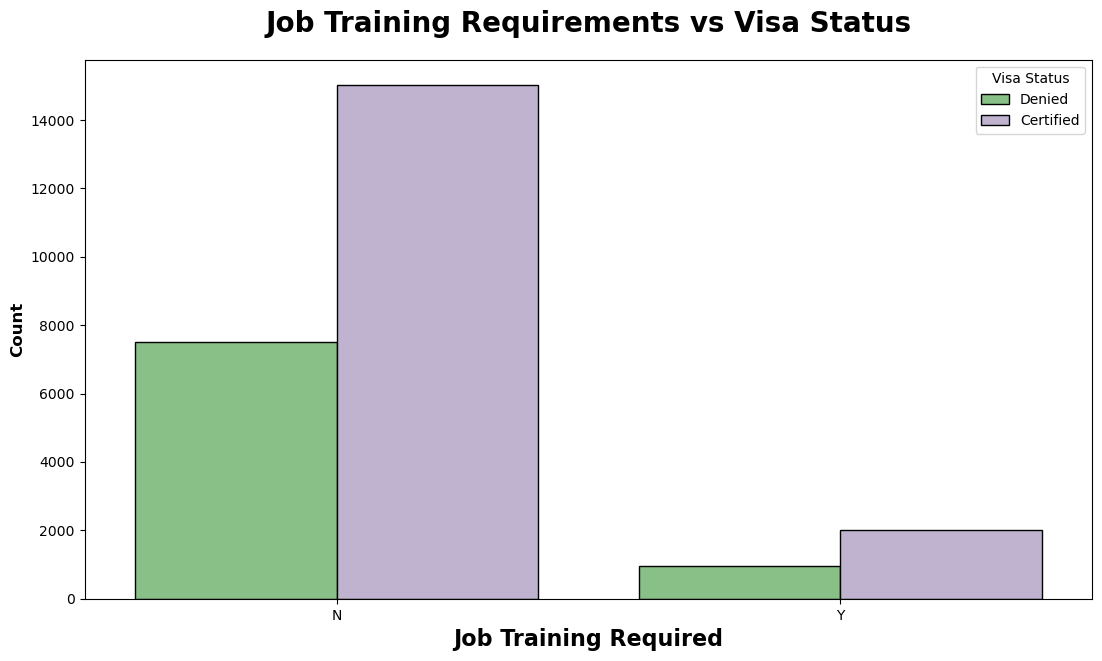

In [28]:
plt.figure(figsize=(13, 7))

# Create a count plot for job training requirements by visa status
sns.countplot(x="requires_job_training", hue="case_status", data=df, edgecolor="black", palette="Accent")

# Set plot title and labels with proper formatting
plt.title("Job Training Requirements vs Visa Status", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Job Training Required", weight="bold", fontsize=16)

# Add a legend for clarity
plt.legend(title="Visa Status", fancybox=True)

# Display the plot
plt.show()


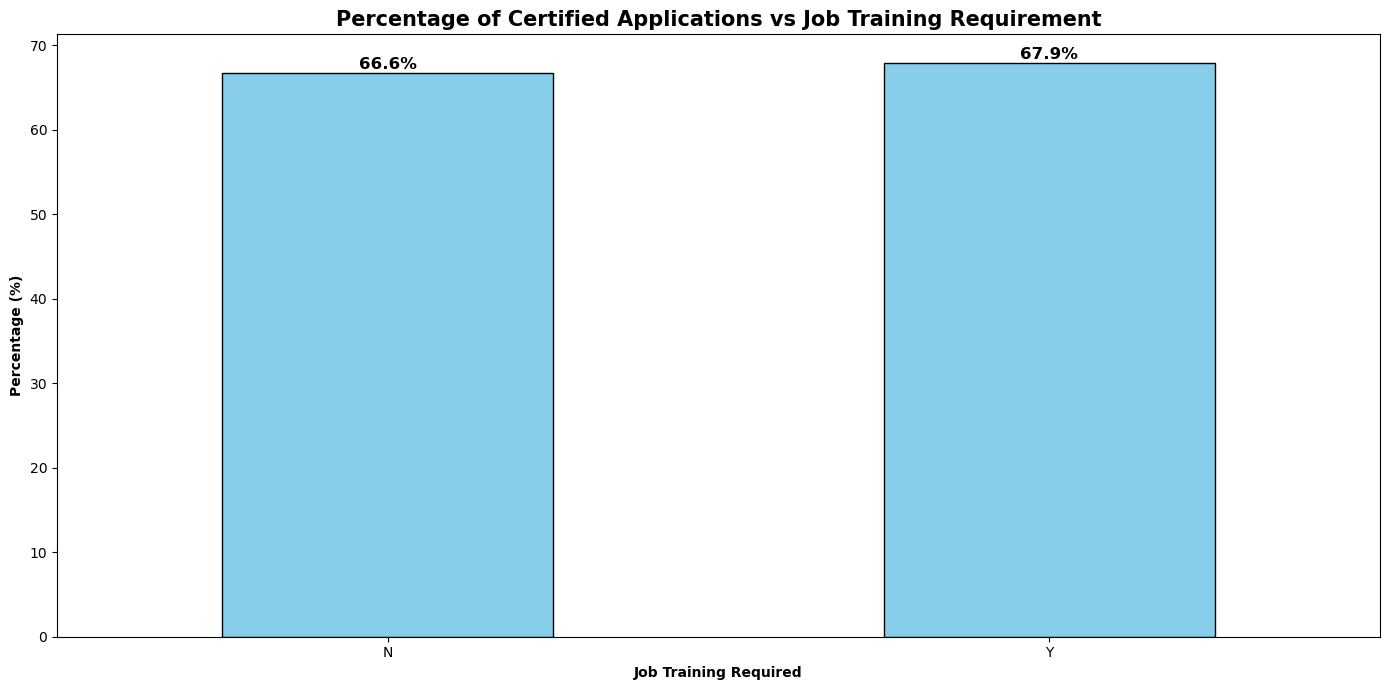

In [29]:
plt.figure(figsize=(14, 7))

# Calculate the percentage of certified applications based on job training requirements
certified_percentage = (100 * df2[df2["case_status"] == 'Certified']['requires_job_training'].value_counts() / df2['requires_job_training'].value_counts())

# Plot the bar chart
certified_percentage.plot(kind='bar', color='skyblue', edgecolor='black')

# Set the title and labels with proper formatting
plt.title("Percentage of Certified Applications vs Job Training Requirement", fontsize=15, fontweight='bold')
plt.xlabel('Job Training Required', fontweight='bold')
plt.ylabel('Percentage (%)', fontweight='bold')

# Add percentage labels on top of the bars
for n, count in enumerate(certified_percentage):
    percentage_str = '{:0.1f}%'.format(count)
    plt.text(n, count + 0.5, percentage_str, ha='center', fontsize=12, weight='bold')

# Set x-tick labels to rotate for better visibility
plt.xticks(rotation=0)

# Show the plot
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlapping
plt.show()


**Report**

**Overview:**
The analysis of job training requirements among visa applicants reveals significant insights into their impact on certification rates.

1. **Job Training Requirement:**
   - A substantial majority, **88%**, of applicants do not require job training.

2. **Certification Rates:**
   - Among applicants who do not require job training, **63%** were certified.
   - In contrast, for those who require job training, the certification rate is slightly lower at **67%**.

3. **Statistical Analysis:**
   - The results of the Chi-Squared test indicate that the job training requirement has a negligible effect on visa status, as confirmed by the above analysis and visualizations.

**Conclusion:**
The findings suggest that the necessity for job training does not significantly influence the likelihood of certification for visa applicants. This insight could inform future decisions regarding job training policies for applicants.

### Impact of Number of employers

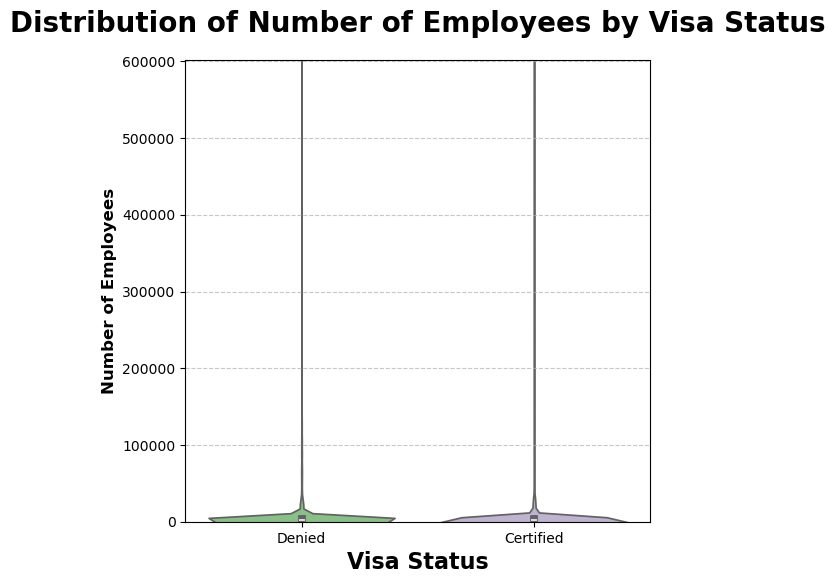

In [59]:
# Set up the figure size for better visualization
plt.subplots(figsize=(6, 6))

# Create a violin plot to visualize the distribution of 'no_of_employees' by 'case_status'
# Using 'hue' to differentiate based on 'case_status'
sns.violinplot(x="case_status", y='no_of_employees', data=df, hue="case_status", palette="Accent", legend=False)

# Set the title and labels for the plot
plt.title("Distribution of Number of Employees by Visa Status", weight="bold", fontsize=20, pad=20)
plt.ylabel("Number of Employees", weight="bold", fontsize=12)
plt.xlabel("Visa Status", weight="bold", fontsize=16)

# Set y-axis limits for better visibility (adjust as needed)
plt.ylim(df['no_of_employees'].min() - 5, df['no_of_employees'].max() + 5)

# Optional: Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()


**Report:**

The distribution of the number of employees for both visa status categories (Certified and Denied) appears to be similar, indicating that the number of employees does not significantly differentiate between the two classes. However, it is important to note the presence of outliers in both categories, which may affect the overall analysis.

These outliers should be addressed during feature engineering to ensure they do not skew the results or mislead interpretations. Appropriate handling techniques may include removal, transformation, or imputation, depending on the context and impact of these outliers.

### Impact of wages

In [31]:
df.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [32]:
df.groupby("unit_of_wage")["case_status"].value_counts(normalize=True)*100

unit_of_wage  case_status
Hour          Denied         65.368567
              Certified      34.631433
Month         Certified      61.797753
              Denied         38.202247
Week          Certified      62.132353
              Denied         37.867647
Year          Certified      69.885027
              Denied         30.114973
Name: proportion, dtype: float64

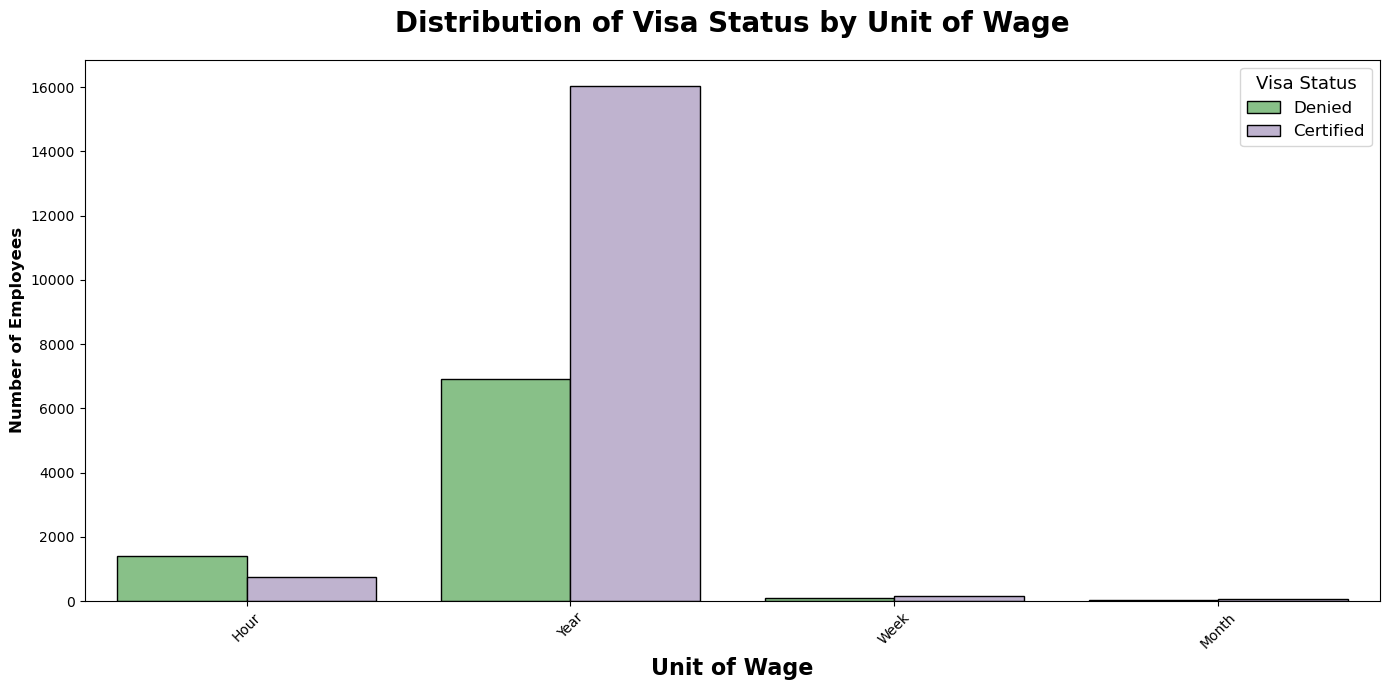

In [33]:
plt.figure(figsize=(14, 7))
sns.countplot(
    x="unit_of_wage",
    hue="case_status",
    data=df,
    edgecolor='black',
    palette='Accent'
)

# Add title and labels with improved formatting
plt.title("Distribution of Visa Status by Unit of Wage", weight="bold", fontsize=20, pad=20)
plt.xlabel("Unit of Wage", weight="bold", fontsize=16)
plt.ylabel("Number of Employees", weight="bold", fontsize=12)

# Improve legend appearance
plt.legend(title="Visa Status", title_fontsize='13', fontsize='12', fancybox=True)

# Show the plot
plt.xticks(rotation=45)  # Optional: rotate x-axis labels for better readability
plt.tight_layout()        # Adjust layout to prevent clipping
plt.show()


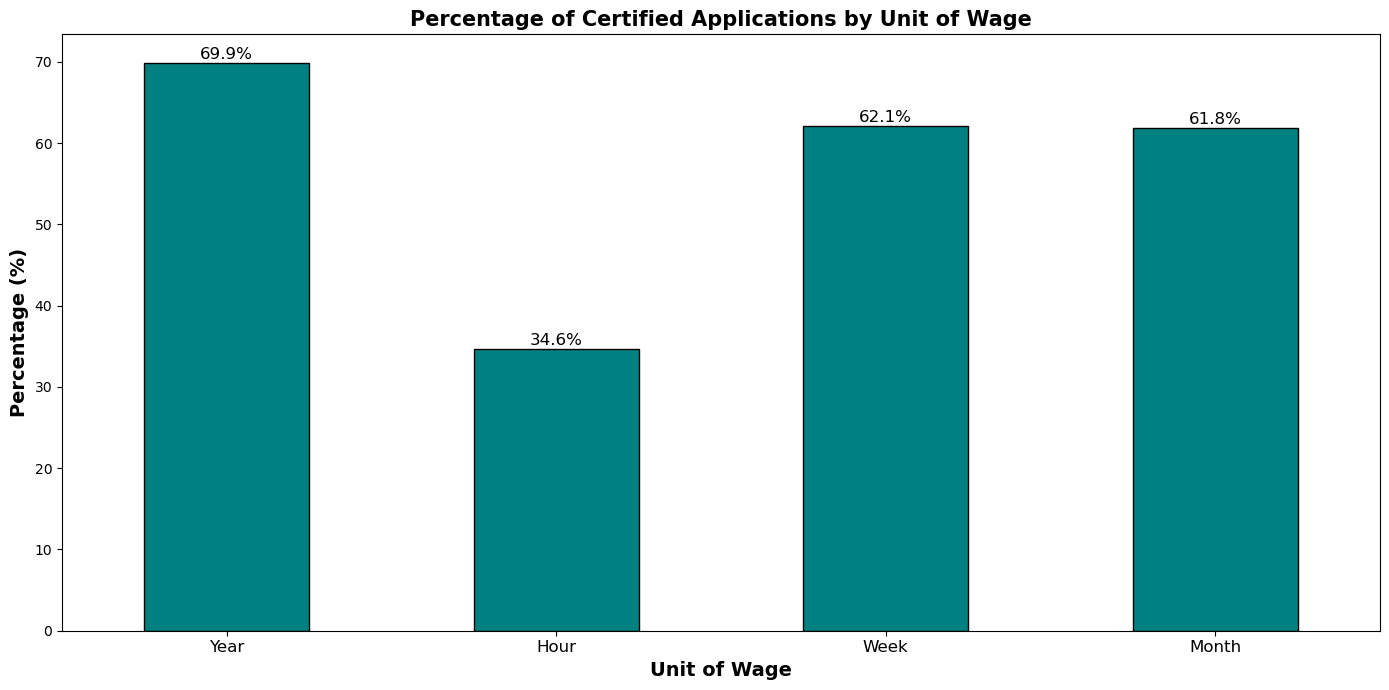

In [34]:
plt.figure(figsize=[14, 7])

# Calculate percentage of certified applications for each unit of wage
certified_percentage = (
    100 * df2[df2["case_status"].isin(['Certified'])]['unit_of_wage'].value_counts() /
    df2['unit_of_wage'].value_counts()
)

# Plot the percentage as a bar chart
certified_percentage.plot(kind='bar', color='teal', edgecolor='black')

# Title and labels
plt.title("Percentage of Certified Applications by Unit of Wage", fontsize=15, fontweight='bold')
plt.xlabel('Unit of Wage', fontweight='bold', fontsize=14)
plt.ylabel('Percentage (%)', fontweight='bold', fontsize=14)

# Adding percentage labels on top of the bars
for n, count in enumerate(certified_percentage):
    percentage_text = '{:0.1f}%'.format(count)
    plt.text(n, count + 0.5, percentage_text, ha='center', fontsize=12)

# Improve x-tick visibility and layout
plt.xticks(rotation=0, fontsize=12)
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


**Report**
The analysis of application outcomes based on the unit of wage reveals the following insights:

1. **Hourly Wage Applications**:
   A significant majority of applicants who applied for hourly wages experienced denial, with **65%** of these applications being rejected. This indicates a notable challenge for hourly wage applicants in securing certification.

2. **Yearly Wage Applications**:
   In contrast, applicants who submitted yearly wage applications showed more favorable outcomes, with **69%** being accepted. This highlights a strong likelihood of certification for those applying for annual contracts, suggesting that longer-term employment arrangements may be viewed more favorably.

3. **Comparative Insights**:
   Yearly contracts stand out as the most successful application type, followed closely by weekly and monthly contracts. The acceptance rates for these units of wage indicate a trend where more structured, long-term employment options are associated with higher approval rates.

Overall, these findings suggest that the nature of the employment contract significantly influences the likelihood of visa certification, with yearly contracts offering the best prospects for approval, while hourly wage applications face considerable obstacles.

### Impact of region of employment

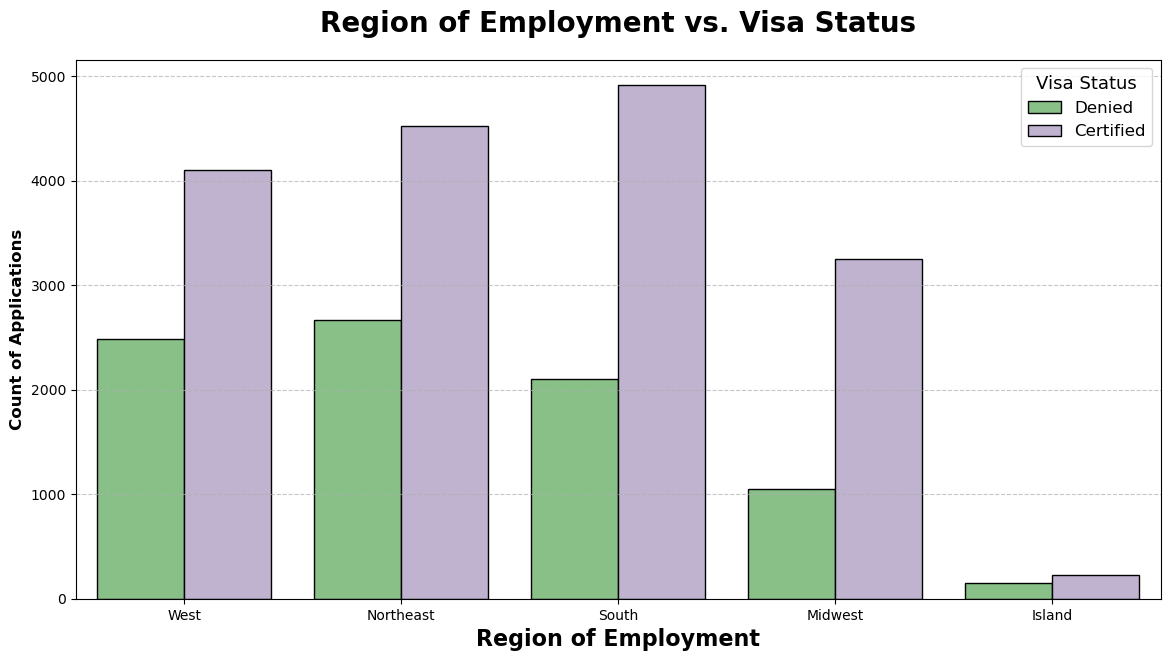

In [35]:
plt.subplots(figsize=(14, 7))

# Create countplot with enhanced aesthetics
sns.countplot(x="region_of_employment", hue="case_status", data=df, edgecolor='black', palette='Accent')

# Set title and labels with improved formatting
plt.title("Region of Employment vs. Visa Status", weight="bold", fontsize=20, pad=20)
plt.xlabel("Region of Employment", weight="bold", fontsize=16)
plt.ylabel("Count of Applications", weight="bold", fontsize=12)

# Customize the legend for clarity
plt.legend(title="Visa Status", fancybox=True, title_fontsize='13', fontsize='12')

# Show grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()


/tmp/ipykernel_68907/2654649744.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = certified_percentage[n]


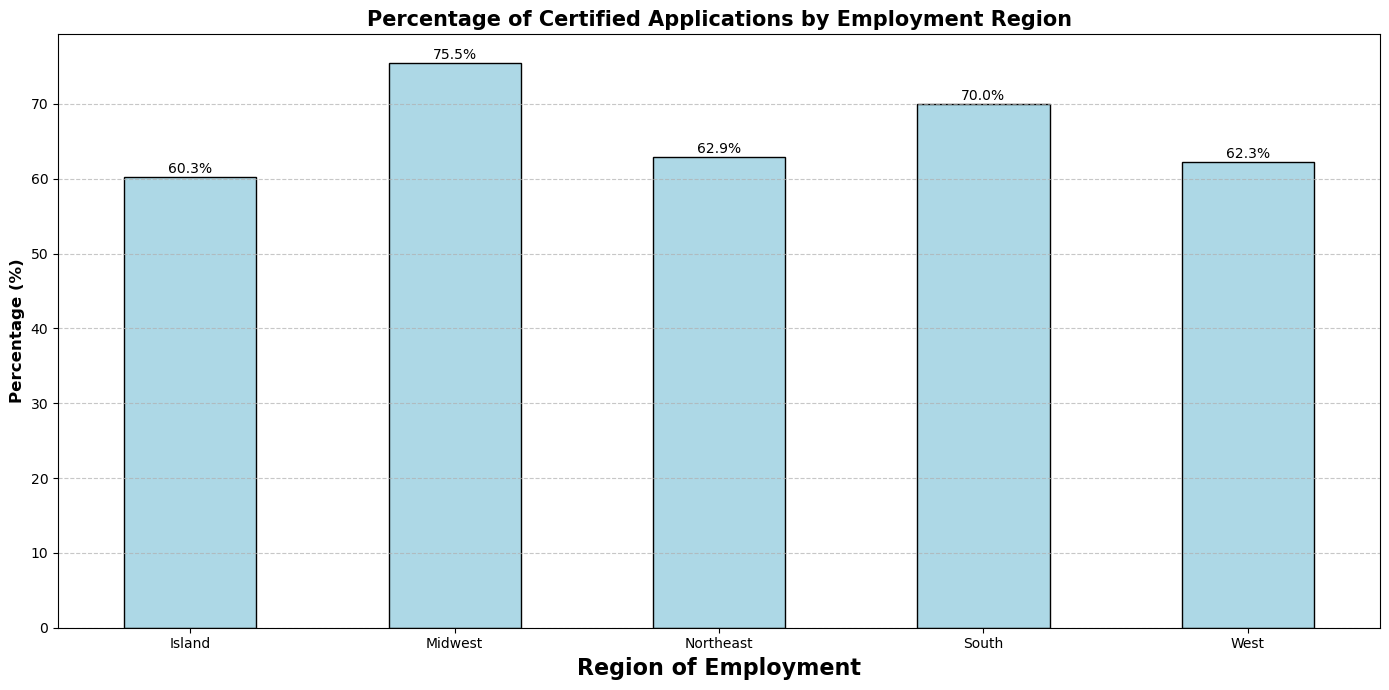

In [36]:
plt.figure(figsize=[14, 7])

# Calculate the percentage of certified applications per region of employment
certified_percentage = (
    100 * df2[df2["case_status"] == 'Certified']['region_of_employment'].value_counts() /
    df2['region_of_employment'].value_counts()
)

# Plot the percentage as a bar chart
certified_percentage.plot(kind='bar', color='lightblue', edgecolor='black')

# Set the title and labels
plt.title("Percentage of Certified Applications by Employment Region", fontsize=15, fontweight='bold')
plt.xlabel('Region of Employment', fontweight='bold', fontsize=16)
plt.ylabel('Percentage (%)', fontweight='bold', fontsize=12)

# Annotate the bars with the percentage values
for n in range(certified_percentage.shape[0]):
    count = certified_percentage[n]
    plt.text(n, count + 0.5, '{:0.1f}%'.format(count), ha='center', fontsize=10)

# Customize x-ticks and layout
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines for better readability

# Show the plot
plt.tight_layout()
plt.show()


**Report:**
The chart indicates that all regions exhibit a relatively similar pattern regarding visa certification and denial rates. However, a slight advantage is observed for applicants from the Midwest region, followed closely by those from the South region. This suggests that while regional differences exist, they are not substantial, highlighting a uniformity in outcomes across the different regions.



### Impact of Prevailing wage

In [37]:
df.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [38]:
df.groupby('prevailing_wage')['case_status'].value_counts()

prevailing_wage  case_status
2.1367           Certified      1
2.9561           Denied         1
3.0031           Denied         1
3.3188           Denied         1
3.4889           Certified      1
                               ..
311734.4900      Certified      1
314156.0600      Certified      1
315497.6000      Certified      1
318446.0500      Certified      1
319210.2700      Denied         1
Name: count, Length: 25462, dtype: int64

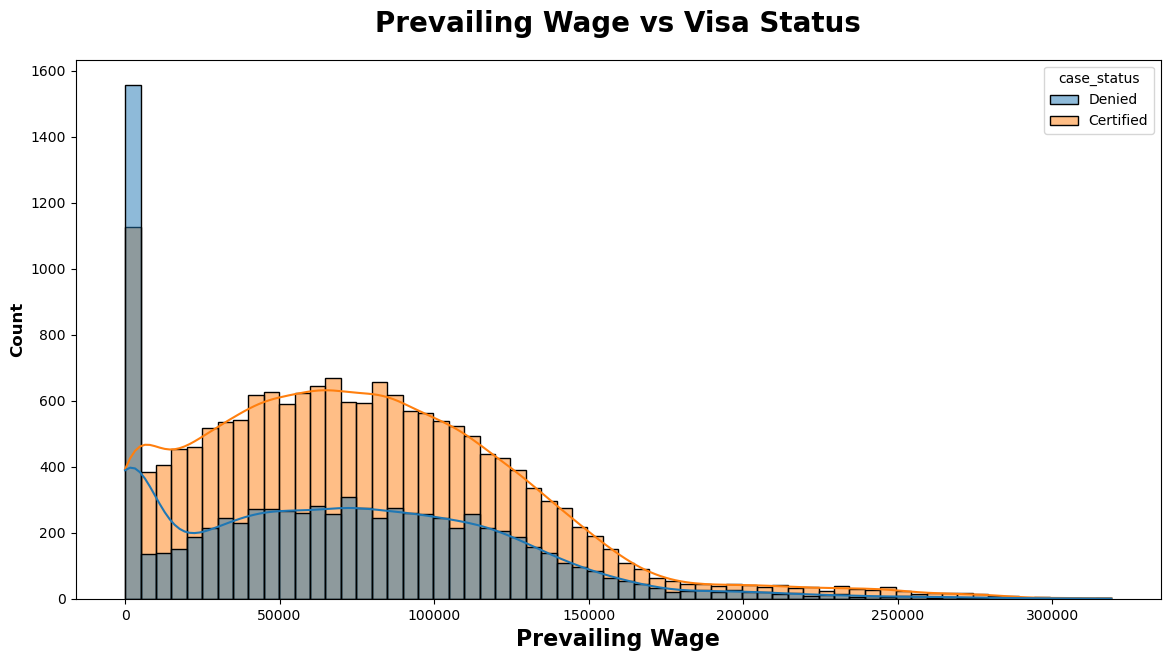

In [39]:
# Set the figure size for the plot
plt.subplots(figsize=(14, 7))

# Create a histogram with a kernel density estimate (KDE) overlay
sns.histplot(
    data=df,               # Data source
    x="prevailing_wage",   # Variable for the x-axis
    hue="case_status",     # Variable to color the bars based on case status
    kde=True               # Add KDE line to visualize the distribution
)

# Set the title of the plot
plt.title(
    "Prevailing Wage vs Visa Status",
    weight="bold",
    fontsize=20,
    pad=20  # Add padding above the title
)

# Label the x-axis
plt.xlabel("Prevailing Wage", weight="bold", fontsize=16)

# Label the y-axis
plt.ylabel("Count", weight="bold", fontsize=12)

# Display the plot
plt.show()



**Report:**

The distribution of prevailing wages for both visa status classes—Certified and Denied—exhibits similar patterns. However, there are notable outliers in both classes that need to be addressed.

**Key Observations:**
- Both classes show comparable ranges of prevailing wages, indicating that the wage does not strongly differentiate between certified and denied applications.
- The presence of outliers in the data can skew the analysis and lead to misleading interpretations.

**Recommendations:**
- **Outlier Handling:** Implement methods such as trimming, winsorizing, or transforming the data (e.g., using logarithmic transformation) to mitigate the impact of outliers.
- **Further Analysis:** Post-outlier handling, reassess the distribution to determine if the relationship between prevailing wages and visa status changes, and consider applying more robust statistical methods if necessary.

By addressing the outliers, we can gain a clearer understanding of how prevailing wages influence visa certification outcomes.

#### Prevailing wage based on Education

In [40]:
print('Average Prevailing wage based on Employee education')
df.groupby('education_of_employee')['prevailing_wage'].mean().to_frame().sort_values(by='prevailing_wage',ascending=False)

Average Prevailing wage based on Employee education


,prevailing_wage
education_of_employee,
Master's,78843.057843
Bachelor's,73405.443735
High School,71582.147756
Doctorate,64561.076657


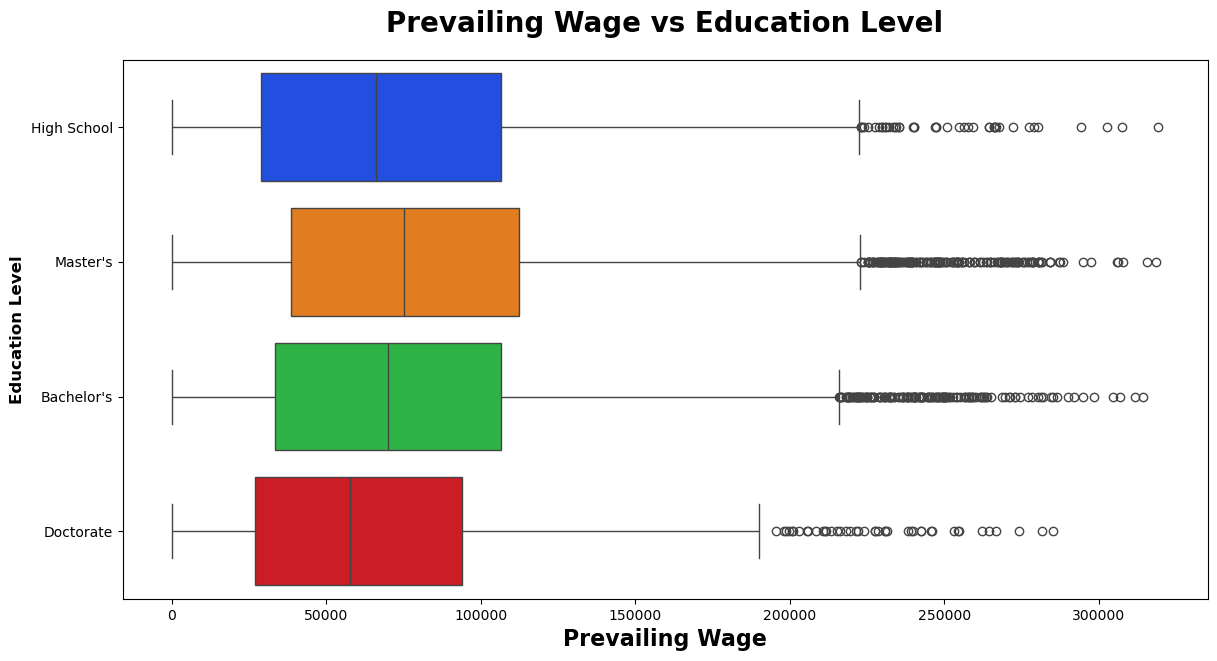

In [65]:
# Set the figure size for the plot
plt.subplots(figsize=(14, 7))

# Create a boxplot to visualize the relationship between education level and prevailing wage
# Use 'hue' for better differentiation based on the 'education_of_employee' variable
sns.boxplot(
    x="prevailing_wage",           # Variable for the x-axis
    y="education_of_employee",      # Variable for the y-axis
    data=df,                       # Data source
    hue="education_of_employee",    # Add hue for differentiation
    palette='bright'               # Color palette for the boxplot
)

# Set the title of the plot
plt.title(
    "Prevailing Wage vs Education Level",  # Updated title for accuracy
    weight="bold",
    fontsize=20,
    pad=20  # Add padding above the title
)

# Label the x-axis
plt.xlabel("Prevailing Wage", weight="bold", fontsize=16)

# Label the y-axis
plt.ylabel("Education Level", weight="bold", fontsize=12)

# Display the plot
plt.show()


**Insight:**
Applicants with a Master's degree have the highest average prevailing wages. The median salary for Master's degree holders is $78.8k, approximately 20% higher than that of Doctorate holders, which is unexpected.

#### Prevailing Wage Based on Job Experience

In [42]:
# Calculate the median prevailing wage based on job experience
median_wage_by_experience = df.groupby('has_job_experience')['prevailing_wage'].median().to_frame().sort_values(by='prevailing_wage', ascending=False)
print('Median Prevailing Wage Based on Job Experience:')
print(median_wage_by_experience)


Median Prevailing Wage Based on Job Experience:
                    prevailing_wage
has_job_experience                 
N                         72602.290
Y                         69033.665


**Report:** Surprisingly, applicants with less job experience have a higher median prevailing wage. Those without job experience earn a median wage of 72k USD, while those with prior experience earn a median wage of 69k USD.

#### Prevailing Wage Based on Continent

In [43]:
# Calculate the average prevailing wage based on continent
average_wage_by_continent = df.groupby('continent')['prevailing_wage'].mean().to_frame().sort_values(by='prevailing_wage', ascending=False)
print('Average Prevailing Wage Based on Continent:')
print(average_wage_by_continent)

Average Prevailing Wage Based on Continent:
               prevailing_wage
continent                     
Asia              79543.021780
Africa            77425.923450
Oceania           75994.276719
North America     68066.319257
South America     60209.575314
Europe            59842.925899


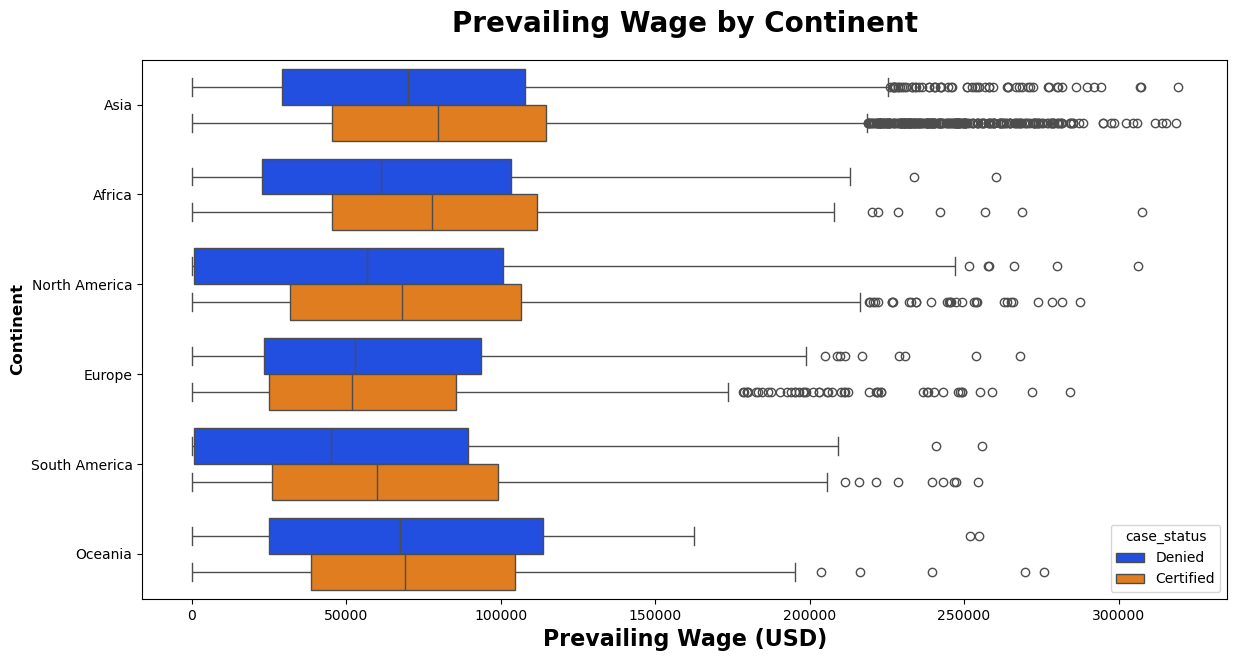

In [63]:
# Set up the figure size for the boxplot
plt.subplots(figsize=(14, 7))

# Create a boxplot to visualize the distribution of prevailing wages by continent
sns.boxplot(
    y="continent",                # Variable for the y-axis
    x="prevailing_wage",          # Variable for the x-axis
    data=df,                      # Data source
    hue="case_status",            # Introduce hue for color differentiation
    palette='bright'              # Specify a color palette
)

# Set the title of the plot with bold font weight and specific fontsize
plt.title("Prevailing Wage by Continent", weight="bold", fontsize=20, pad=20)

# Label the x-axis with a clear description and bold font weight
plt.xlabel("Prevailing Wage (USD)", weight="bold", fontsize=16)

# Label the y-axis to indicate the categories being represented
plt.ylabel("Continent", weight="bold", fontsize=12)

# Show the plot
plt.show()


**Report:** The average prevailing wage for applicants from Asia is higher than that of applicants from other continents.



### Impact of Year of establishment

In [45]:
df.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

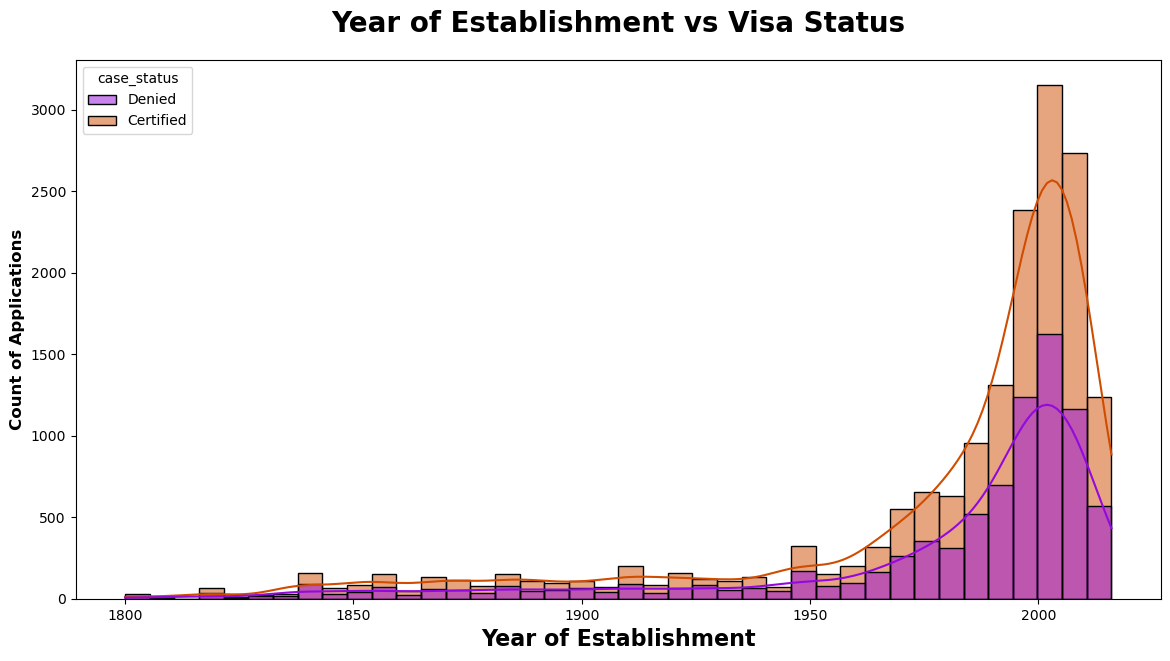

In [46]:
# Set up the figure size for the plot
plt.subplots(figsize=(14, 7))

# Create a histogram plot of the year of establishment ('yr_of_estab')
# Color the histogram based on the case status ('case_status')
sns.histplot(x="yr_of_estab", data=df, bins=40, hue='case_status', palette='gnuplot', kde=True)

# Set the title of the plot with bold font weight and specific fontsize
plt.title("Year of Establishment vs Visa Status", weight="bold", fontsize=20, pad=20)

# Label the x-axis and y-axis with bold font weight and specific font sizes
plt.xlabel("Year of Establishment", weight="bold", fontsize=16)
plt.ylabel("Count of Applications", weight="bold", fontsize=12)

# Show the plot
plt.show()


**Report:** Each bin represents a 5-year interval. Notably, many companies were established after 2000, with the peak of establishments occurring between 2000 and 2005.


##Final Recommendations
  1. **Drop `case_id`**: This column is just an identifier and does not contribute to the analysis.
  2. **Drop `requires_job_training`**: This feature shows minimal impact on the target variable, as confirmed by visualizations and the Chi-Squared test.
  3. **Handle Outliers**: The `no_of_employees` and `prevailing_wage` columns contain outliers that need addressing.
  4. **Consolidate `continent` Values**: Some unique values have very few counts; these can be categorized as "Others" for better analysis.
  5. **Address Class Imbalance**: The target variable, `case_status`, is imbalanced and should be rectified before model building.

## Feature Engineering
### Feature Extraction

In [47]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


as `yr_of_estab` does not hold any meaningful info on its own but can be converted to `company_age` which is a meaningful feature

In [48]:
from datetime import date
present_year=date.today().year
present_year

2024

In [49]:
df['company_age']=present_year-df['yr_of_estab']
# removing 'yr_of_estab'
df.drop('yr_of_estab',inplace=True,axis=1)
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,company_age
0,EZYV01,Asia,High School,N,N,14513,West,592.2029,Hour,Y,Denied,17
1,EZYV02,Asia,Master's,Y,N,2412,Northeast,83425.6500,Year,Y,Certified,22
2,EZYV03,Asia,Bachelor's,N,Y,44444,West,122996.8600,Year,Y,Denied,16
3,EZYV04,Asia,Bachelor's,N,N,98,West,83434.0300,Year,Y,Denied,127
4,EZYV05,Africa,Master's,Y,N,1082,South,149907.3900,Year,Y,Certified,19


## Analysing features

### Numerical Features

**Note:** `O`stands for `object` data type, which is typically used for strings or categorical data in pandas. It essentially means `non-numerical` data.

In [50]:
num_features=[feature for feature in df.columns if df[feature].dtype !='O']
print(f"Numerical feture Columns : {num_features}")
print(f"Number of Numnerical features:  {len(num_features)}")

Numerical feture Columns : ['no_of_employees', 'prevailing_wage', 'company_age']
Number of Numnerical features:  3


### Categorical Features

In [51]:
cat_features=[feature for feature in df.columns if df[feature].dtype == 'O']
print(f"Categorical Feature Columns: {cat_features}")
print(f"Number of Categorical Feature Columns: {len(cat_features)}")

Categorical Feature Columns: ['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']
Number of Categorical Feature Columns: 9


### Discrete Features
Discrete features can only take specific, distinct values. These are typically counted and cannot take fractional values.

**Examples:**

* Number of children (e.g., 0, 1, 2, 3)
* Number of cars (e.g., 1, 2, 3)
* Shoe size (e.g., 7, 8, 9)
  
**Characteristics:**

* Values are typically represented with integers (whole numbers).
* Discrete features have gaps between values (e.g., you can’t have 1.5 children).
* The range of values can be finite or infinite, but the values are distinct.


In [52]:
disc_features=[feature for feature in num_features if len(df[feature].unique())<=25]
disc_features

[]

## Continious features

Continuous features can take any value within a given range, including decimal (fractional) values. These are typically measured and can take an infinite number of values.

**Examples:**

* Height (e.g., 5.72 feet)
* Weight (e.g., 72.5 kg)
* Temperature (e.g., 98.6°F)

**Characteristics:**

* Values are often represented with floating-point numbers.
* Continuous features have a range (min to max) but can theoretically take any value within that range.
* In theory, there are no gaps between values.

## Split DataFrame into Inputs and Outputs
* X = Inputs
* Y = Outputs
  

In [53]:
df.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'region_of_employment',
       'prevailing_wage', 'unit_of_wage', 'full_time_position', 'case_status',
       'company_age'],
      dtype='object')

In [54]:
X=df.drop('case_status',axis=1)
Y=df['case_status']

In [55]:
# Viewing inputs
X.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,company_age
0,EZYV01,Asia,High School,N,N,14513,West,592.2029,Hour,Y,17
1,EZYV02,Asia,Master's,Y,N,2412,Northeast,83425.6500,Year,Y,22
2,EZYV03,Asia,Bachelor's,N,Y,44444,West,122996.8600,Year,Y,16
3,EZYV04,Asia,Bachelor's,N,N,98,West,83434.0300,Year,Y,127
4,EZYV05,Africa,Master's,Y,N,1082,South,149907.3900,Year,Y,19


In [56]:
# Outputs
Y.head()

0       Denied
1    Certified
2       Denied
3       Denied
4    Certified
Name: case_status, dtype: object